## Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Carregando o dataset

In [2]:
#Trazendo o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


## Explorando os dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

## Exibição dos dados

Text(0.5, 1.0, '9')

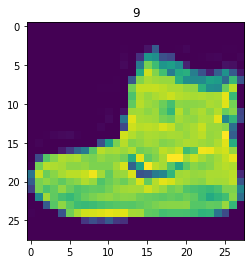

In [4]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [5]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis', 'Bolsa','Bota']

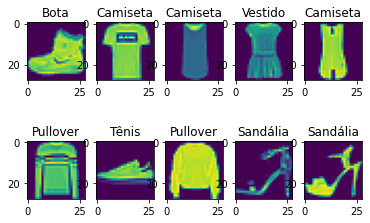

In [6]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

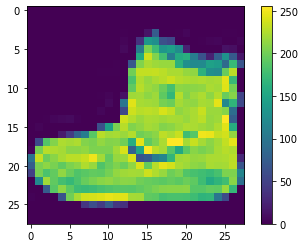

In [7]:
plt.imshow(imagens_treino[0])
plt.colorbar()

## Normalizando as imagens

In [8]:
imagens_treino = imagens_treino/float(255)

## Criando, compilando, treinando e normalizando o modelo

In [9]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5297 - accuracy: 0.8115 - val_loss: 0.4432 - val_accuracy: 0.8443
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3959 - accuracy: 0.8547 - val_loss: 0.3575 - val_accuracy: 0.8712
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3597 - accuracy: 0.8670 - val_loss: 0.3503 - val_accuracy: 0.8705
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8748 - val_loss: 0.3420 - val_accuracy: 0.8744
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3209 - accuracy: 0.8817 - val_loss: 0.3424 - val_accuracy: 0.8769


## Salvando e carregando o modelo treinado

In [10]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

## Testando o modelo e o modelo salvo

In [11]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[0]))
print('número da imagem de teste:', identificacoes_teste[0])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 1ms/step
resultado teste: 9
número da imagem de teste: 9
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


## Avaliando o modelo

In [12]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 54.6529 - accuracy: 0.8699
Perda do teste: 54.65289306640625
Acurácia do teste: 0.8698999881744385


## Visualizando as acurácias de treino e validação por época

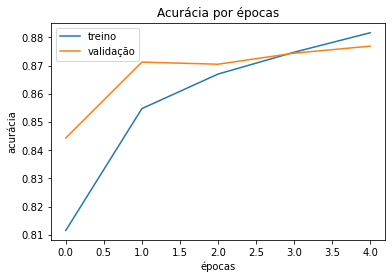

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

## Visualizando as perdas de treino e validação por época

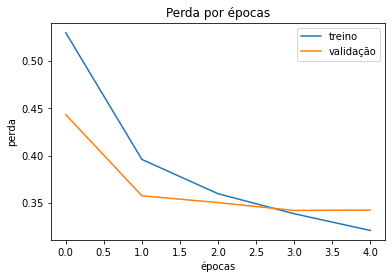

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])